<a href="https://colab.research.google.com/github/ceyhun2306/Data-Analysis/blob/main/data_analysing/Global_Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
#!/bin/bash
!kaggle datasets download thedevastator/global-video-game-sales

Dataset URL: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales
License(s): CC0-1.0
global-video-game-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip/content/global-video-game-sales.zip

/bin/bash: line 1: unzip/content/global-video-game-sales.zip: No such file or directory


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/content/global-video-game-sales.zip")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
df.shape

(16598, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [11]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [13]:
df["Year"].value_counts().sort_index()

,count
Year,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


In [14]:
df["Genre"].value_counts()

,count
Genre,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


In [15]:
df["Publisher"].value_counts()

,count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
...,...
Media Entertainment,1
New World Computing,1
Genterprise,1


# Handling missing data.

In [16]:
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


### As we see there are 271 data in Year coulumn and 58 data in publisher coulumn are missing.

# Let's start firstly with year coulumn

In [17]:
df['Year'].isna().sum()
year_missing = df[df['Year'].isna()]
year_missing['Genre'].value_counts().head(10)

,count
Genre,
Action,63
Sports,42
Misc,29
Shooter,28
Racing,23
Role-Playing,17
Simulation,16
Fighting,12
Puzzle,11


### Here we see that from every genre there are missing data about their year.
###- The missing 'Year' values mostly appear in Action, Sports, and Shooter genres, and on Wii, PS2, and DS platforms.
###- This happens because some games were re-released or appeared on multiple platforms,and certain entries lack the specific release year for that version.
### - Therefore, the missingness is MAR (Missing At Random),since it's related to 'Platform' and 'Genre'.

### For fixing this issue best solution is filling missing 'Year' values using the median year of the same Genre and Platform

In [18]:
df['Year'] = df.groupby(['Genre', 'Platform'])['Year'].transform(
    lambda x: x.fillna(x.median())
)

#Now it is time to handle with missing data in oublisher coulumn

In [19]:
df['Platform'].isna().sum()
year_missing = df[df['Platform'].isna()]
year_missing['Genre'].value_counts().head(10)

,count
Genre,


###Here we see that from every genre there are missing data about their publisher.
###- Missing 'Publisher' values mostly appear in Misc and Action genres,and on GBA, DS, and PC platforms.
###- These are often small or independent games without an official publisher.
###- Therefore, the missingness is MNAR (Missing Not At Random),because the value is truly absent, not randomly lost.

### For this issue the best solution is replacing null values with unknown for not lossing data

In [20]:
df['Publisher'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1225157459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)


In [21]:
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


### Now our problem about missing data is over

# Now let's examine the overall sales' median and outlier values and analyze them.


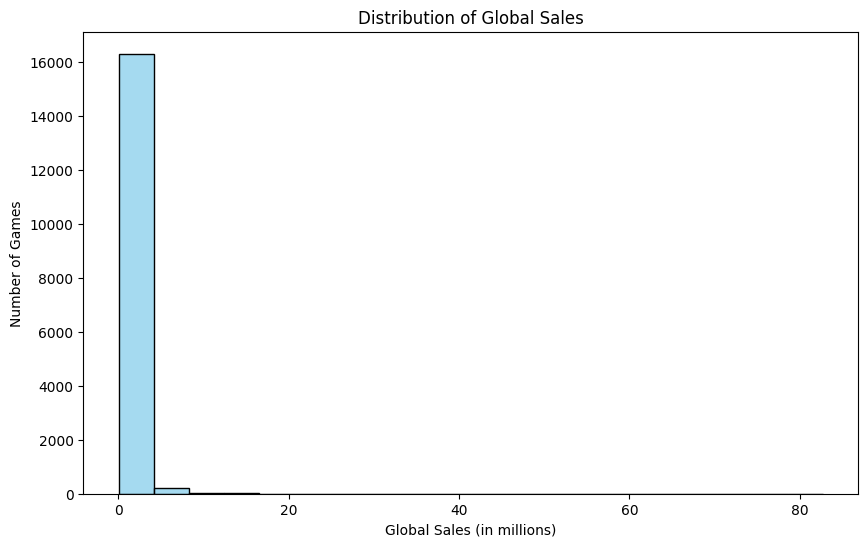

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['Global_Sales'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Number of Games')
plt.show()

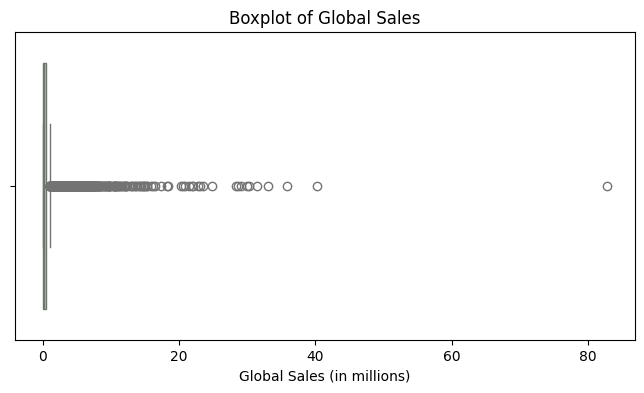

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Global_Sales'], color='lightgreen')
plt.title('Boxplot of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.show()

###It is also evident here that the outliers are very few, so they do not pose a problem for our data. Therefore, there is no need to remove or modify them, and we can proceed with analyzing our dataset.


#Comparison of Sales by Region.

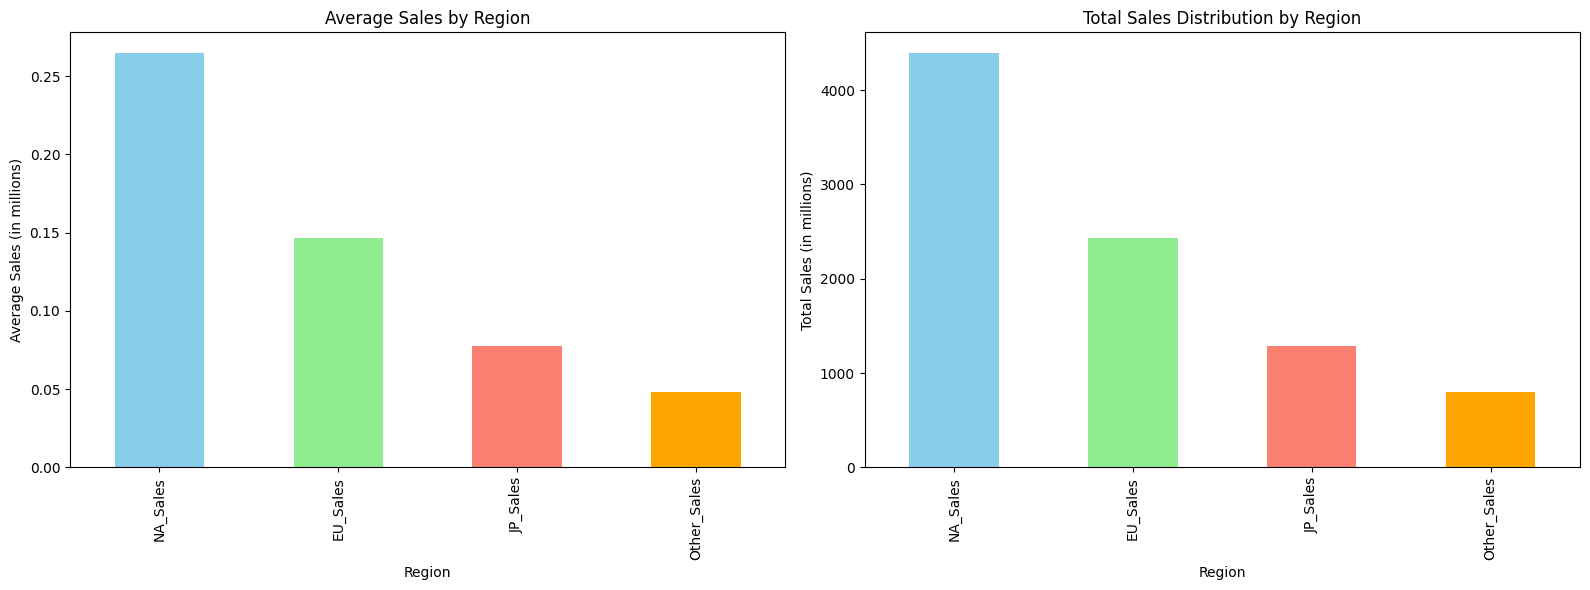

In [24]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


mean_sales = df[regions].mean()
total_sales = df[regions].sum()


fig, axes = plt.subplots(1, 2, figsize=(16,6))

mean_sales.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'orange'], ax=axes[0])
axes[0].set_title('Average Sales by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Sales (in millions)')


total_sales.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'orange'], ax=axes[1])
axes[1].set_title('Total Sales Distribution by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

##Average Sales by Region (left bar chart):
###This chart shows the average sales for each region. North America (NA_Sales) has the highest average, indicating that games sell best there. Europe (EU_Sales) comes second, while Japan (JP_Sales) and other regions have lower average sales.

##Total Sales Distribution by Region (right bar chart):
###This chart displays the total sales share by region. North America dominates, accounting for the largest portion of overall sales. Europe is second, with a noticeable gap compared to North America. Japan and other regions contribute smaller shares of total sales.

#The most sailed genres

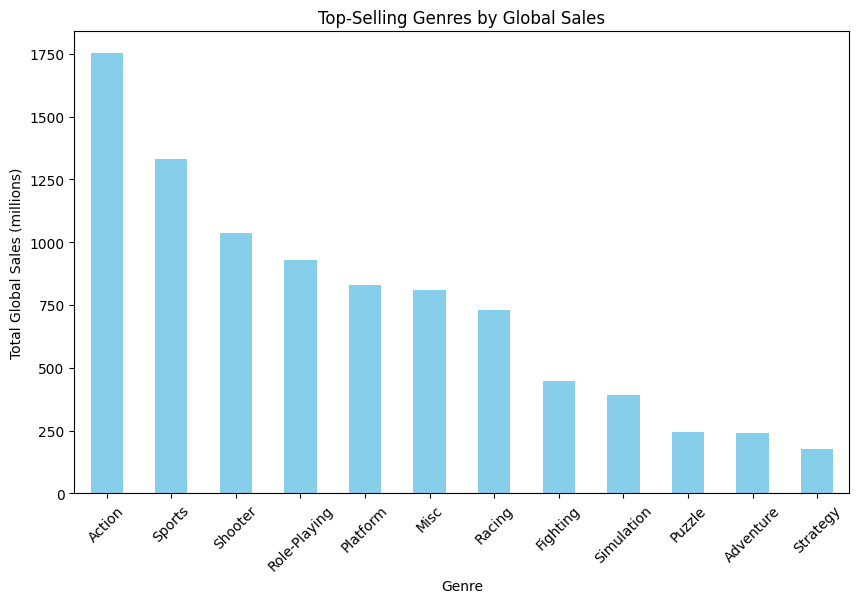

In [25]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Top-Selling Genres by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()

###It is also evident that Action, Sports, Shooter, and Role-Playing games have sold the most. This is because these games offer high excitement, action, and adrenaline. On the other hand, Strategy and Puzzle games have sold less. These games require more thinking and careful planning, which puts them outside the general interest of many players. In the end, people tend to prefer games that provide adrenaline and excitement rather than those that are more strategic or mentally demanding.

#Most popular platforms

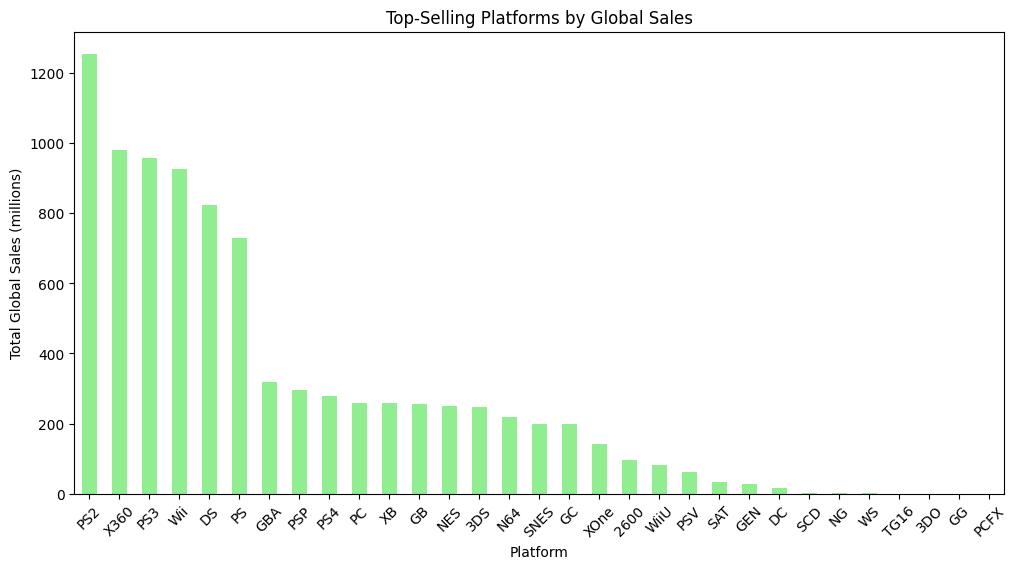

In [26]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)


plt.figure(figsize=(12,6))
platform_sales.plot(kind='bar', color='lightgreen')
plt.title('Top-Selling Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()

###Overall, looking at the visualization, the dominance of PlayStation and Xbox is evident. However, when examined separately, PlayStation clearly leads. Following that, Xbox 360 and the closely performing PS3 come next. Unlike PS and Xbox, platforms like Wii and DS also stand out. Other platforms such as SCD, NG, SW, and similar show relatively weaker performance. One of the main reasons for this is that many of these platforms were released more recently, which can be further investigated by analyzing sales trends over the years.

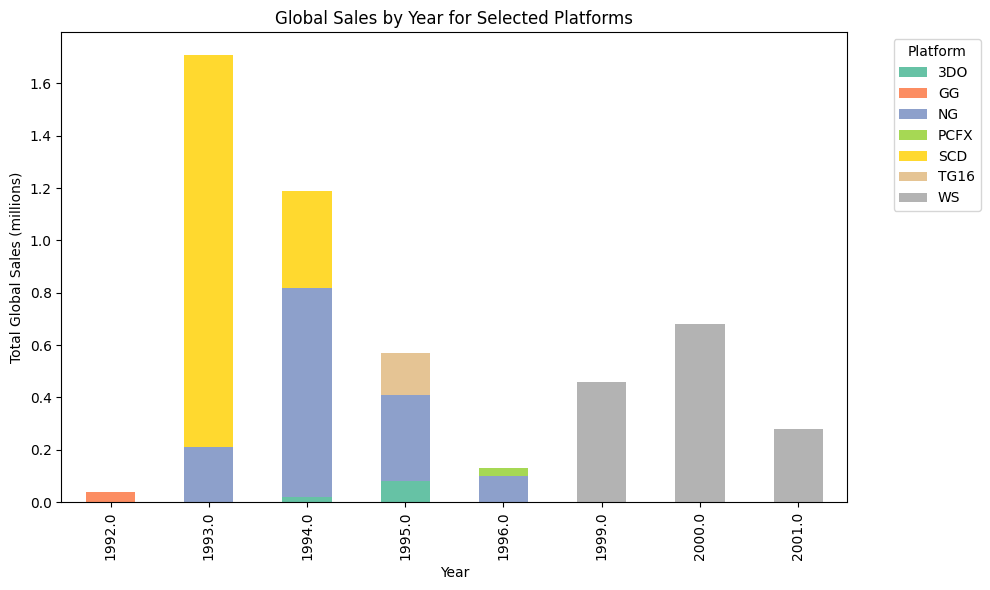

In [27]:
platforms = ['SCD', 'NG', 'WS', 'TG16', '3DO', 'GG', 'PCFX']

# Filter dataset for selected platforms
df_filtered = df[df['Platform'].isin(platforms)]

# Pivot table: rows = Year, columns = Platform, values = Global_Sales sum
sales_pivot = df_filtered.pivot_table(index='Year', columns='Platform', values='Global_Sales', aggfunc='sum').fillna(0)

# Plot stacked bar chart
sales_pivot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Global Sales by Year for Selected Platforms')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

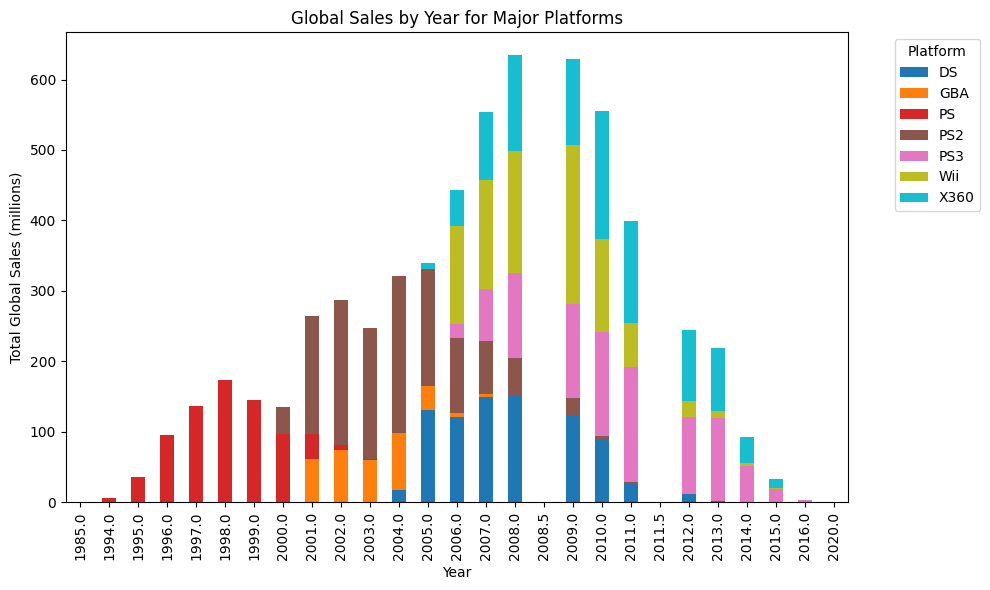

In [28]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA']

# Filter dataset for selected platforms
df_filtered = df[df['Platform'].isin(platforms)]

# Pivot table: rows = Year, columns = Platform, values = Global_Sales sum
sales_pivot = df_filtered.pivot_table(index='Year', columns='Platform', values='Global_Sales', aggfunc='sum').fillna(0)

# Plot stacked bar chart
sales_pivot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab10')
plt.title('Global Sales by Year for Major Platforms')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

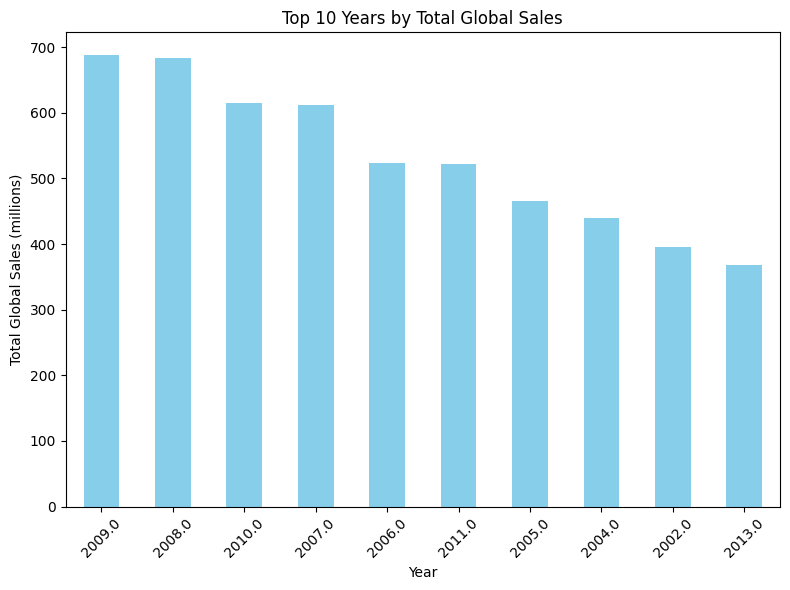

In [29]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()


top_10_years = yearly_sales.sort_values(ascending=False).head(10)


plt.figure(figsize=(8,6))
top_10_years.plot(kind='bar', color='skyblue')
plt.title('Top 10 Years by Total Global Sales')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###From all these visualizations, it is clear that the period between 2002 and 2011 represents the years with the highest game sales. Platforms like PlayStation and Xbox achieved their peak sales during this time, which is why, in terms of sales performance, they rank higher compared to other platforms.

# Relationship between genre and region

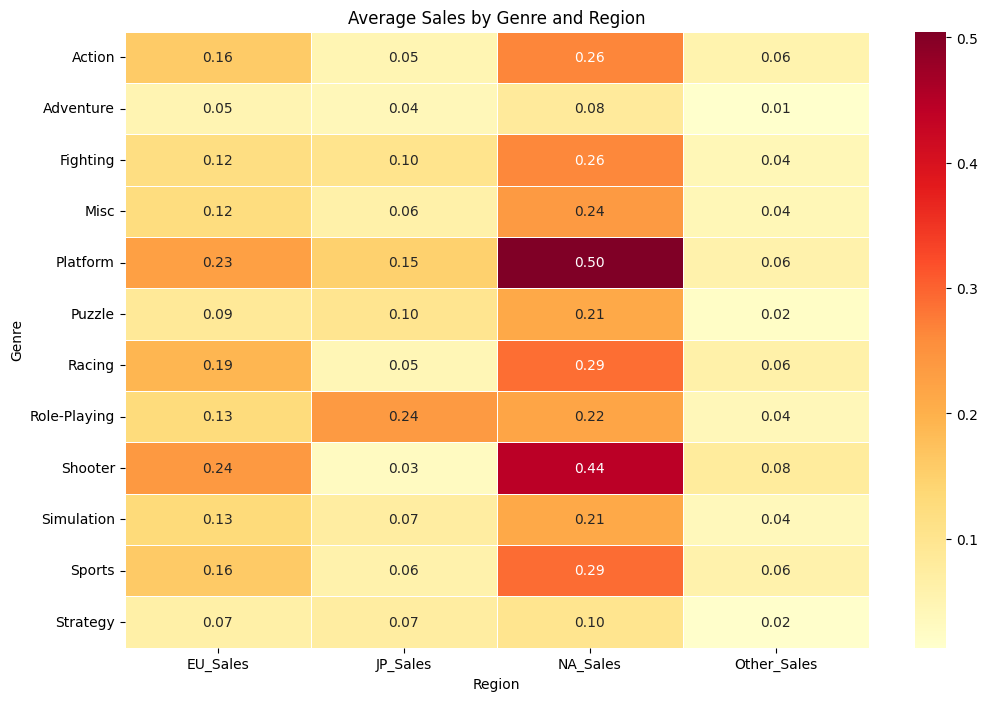

In [30]:
region_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
genre_region_sales = df.pivot_table(index='Genre', values=region_columns, aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(genre_region_sales, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
plt.title('Average Sales by Genre and Region')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.show()

###From the heatmap, we can see clear regional preferences for different game genres:

### In North America (NA_Sales), the Platform and Shooter genres dominate,indicating a strong preference for action-oriented and console-based games.

###🇯🇵 In Japan (JP_Sales), Role-Playing games have significantly higher sales,showing the cultural popularity of RPGs in the Japanese market.

###🇪🇺 In Europe (EU_Sales), Shooter and Platform genres perform fairly well,but the differences between genres are less extreme compared to NA.

###In the "Other" regions, sales are generally low across all genres, with no single genre showing clear dominance.

###Overall, the heatmap highlights how regional tastes differ:
###North America favors shooters and platformers, Japan prefers RPGs, and Europe shows a more balanced mix of genres.

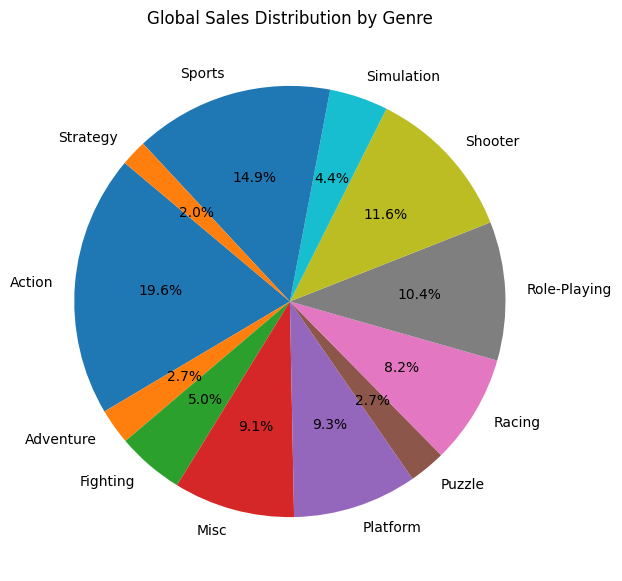

In [33]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum()
genre_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(7,7))
plt.title('Global Sales Distribution by Genre')
plt.ylabel('')
plt.show()


###The pie chart shows the global sales distribution across different game genres.

###Action games dominate the market with around 20% of total global sales,showing their wide appeal among players worldwide.

###Sports games hold the second-largest share (about 15%), driven by franchises like FIFA, PES, and Wii Sports.

###Shooter and Role-Playing games also make up a significant portion (10–12% each), reflecting the growing popularity of competitive and story-driven titles.

###Genres like Puzzle, Adventure, and Strategy have smaller shares, indicating that they cater to more niche audiences.

###Overall, the data reveals that action-oriented and sports genres are the main drivers of global video game sales, while strategic and casual genres play a smaller but steady role.

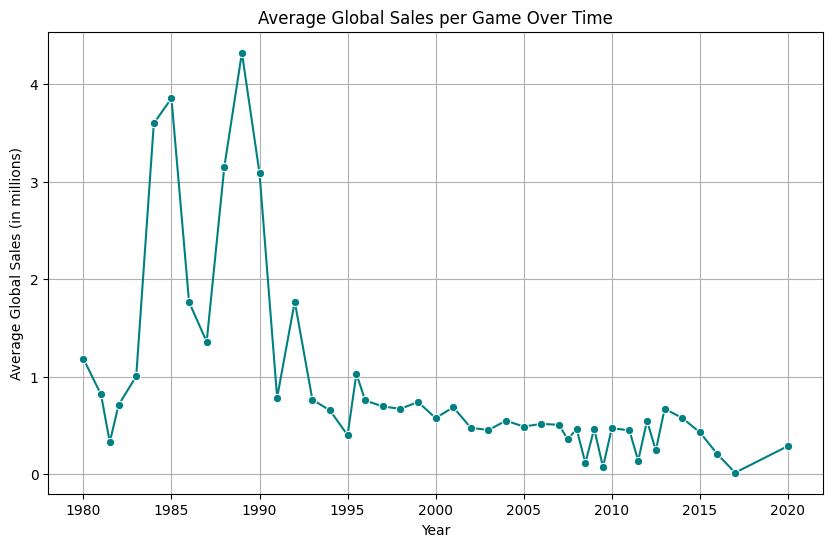

In [34]:
avg_sales_per_year = df.groupby('Year')['Global_Sales'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales_per_year, x='Year', y='Global_Sales', marker='o', color='teal')

plt.title('Average Global Sales per Game Over Time')
plt.xlabel('Year')
plt.ylabel('Average Global Sales (in millions)')
plt.grid(True)
plt.show()

###This line chart illustrates how the average global sales per game have changed over the years.

###Between 1980 and 1990, the gaming industry experienced major spikes in average sales, with certain years (around 1985–1990) showing exceptionally high values.This was due to the limited number of released titles and the massive popularity of a few iconic games such as Super Mario Bros. and Tetris.

###After the mid-1990s, the average sales per game steadily declined. Although the total number of games increased rapidly, individual game sales became smaller as the market grew more competitive and diverse.

###From 2010 onwards, the chart shows relatively stable but low averages, reflecting the shift towards digital distribution, indie games, and mobile platforms, which spread total sales across many smaller titles.

###In summary, early gaming eras were dominated by blockbuster hits, while modern years show a broader market with lower average sales per game.



###In conclusion, the analysis of global video game sales data provides valuable insights into the evolution of the gaming industry over the past decades.

###The sales distribution across genres reveals that Action, Sports, and Shooter games dominate the global market, while genres like Puzzle and Strategy appeal to smaller, more specific audiences.

###Regional analysis shows strong preferences: North America favors Action and Shooter genres, Europe demonstrates balanced interest across categories, and Japan has a clear preference for Role-Playing games.

###The trend over time highlights that the early 2000s were the golden era of physical game sales. However, from 2010 onward, the average sales per game declined — likely due to digital distribution, the rise of indie games, and market saturation.

###Publisher analysis shows that a few major companies (such as Nintendo, EA, and Activision) hold a dominant share of the market, supporting the 80/20 rule in the gaming industry.

###Overall, the data indicates that while the global gaming market continues to expand in diversity, individual game performance has become more competitive, signifying a mature and fragmented industry driven by innovation and player variety.
